In [6]:
import sklearn; print(sklearn.__version__)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


1.5.1


In [7]:
# Load and prepare the data
data = pd.read_excel('Earthquake Damage Data.xlsx')
X = data[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8']]
y = data['DS']

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

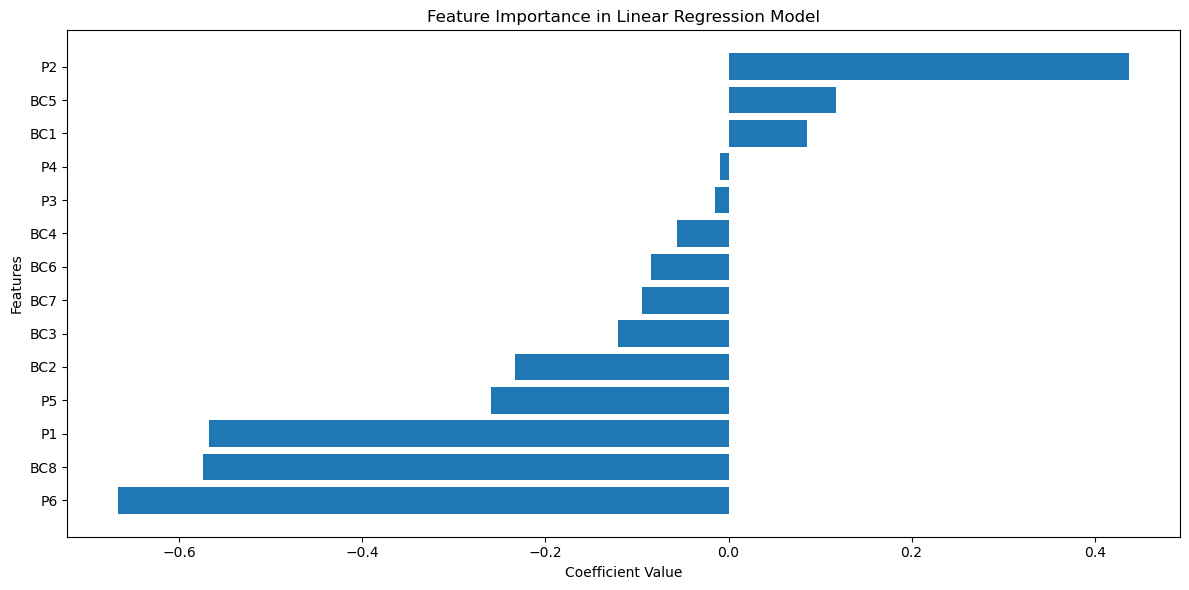

In [12]:
# Create feature importance plot
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [13]:
# Print all results
print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

print("\nFeature Coefficients (sorted by importance):")
for idx, row in coefficients.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 0.7094
Root Mean Squared Error (RMSE): 0.8423
Mean Absolute Error (MAE): 0.4862
R-squared Score: 0.0233

Feature Coefficients (sorted by importance):
P6: -0.6668
BC8: -0.5737
P1: -0.5674
P5: -0.2589
BC2: -0.2330
BC3: -0.1210
BC7: -0.0943
BC6: -0.0842
BC4: -0.0560
P3: -0.0142
P4: -0.0094
BC1: 0.0855
BC5: 0.1177
P2: 0.4378
